## Task2

Ref:
1. https://pytorch.apachecn.org/docs/1.0/pytorch_with_examples.html
2. https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

### numpy和PyTorch实现梯度下降法

In [12]:
import numpy as np

# N是批大小；D_in是输入维度
# H是隐藏层维度；D_out是输出维度  
N, D_in, H, D_out = 64, 1000, 100, 10

# 产生随机输入和输出数据
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# 随机初始化权重
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # 前向传播：计算预测值y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # 计算并显示loss（损失）
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # 反向传播，计算w1、w2对loss的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 34466856.06126369
1 34041796.651330344
2 45211583.578740835
3 59626099.12069431
4 61258370.17195523
5 40139572.71317263
6 15824319.682214037
7 4814272.720302796
8 1945695.618979135
9 1223948.2239240266
10 954681.9197147046
11 795183.8197733068
12 676686.6477846421
13 582071.5300420966
14 504583.9035260956
15 440401.69840936945
16 386634.17912817205
17 341332.7607270223
18 302939.8518256209
19 270126.18840866745
20 241883.55486841168
21 217434.2241160766
22 196165.9873330586
23 177581.99614658038
24 161249.44979636298
25 146836.77054637423
26 134065.5501333881
27 122721.5470506805
28 112605.95370933719
29 103556.53131582795
30 95418.71436941114
31 88084.44085821051
32 81459.91920744057
33 75465.03973286322
34 70019.01366020087
35 65061.72472470868
36 60540.29190787142
37 56407.9421812035
38 52624.97134725201
39 49151.17669862496
40 45955.02272183241
41 43013.043808463204
42 40301.49900454146
43 37797.908570724634
44 35479.74053992976
45 33330.93133004868
46 31336.181992073005
47 29482

405 0.007914890218154036
406 0.0076102422991717236
407 0.007317399088261361
408 0.007035944156981442
409 0.006765223869489671
410 0.006504988375515627
411 0.006254731117298641
412 0.0060141437656883725
413 0.0057828859638638305
414 0.005560483899725395
415 0.00534669246159771
416 0.0051411880669139575
417 0.004943573125107466
418 0.004753590250606053
419 0.004570908148563027
420 0.0043952317531386394
421 0.004226329991866311
422 0.004063963005743782
423 0.003907868221814133
424 0.003757774235791646
425 0.0036134445826605643
426 0.0034746815990879054
427 0.0033413322600934327
428 0.00321302876178799
429 0.0030896600143023854
430 0.002971040635079384
431 0.0028570397492194773
432 0.0027474032372198426
433 0.0026419655843067428
434 0.002540570330364162
435 0.0024430928275846215
436 0.0023493927880103207
437 0.002259307533598534
438 0.0021726310398136888
439 0.0020893002240302875
440 0.002009184039002371
441 0.0019321641820564217
442 0.0018580938503871337
443 0.0017868679566942873
444 0.00

In [13]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

# N是批大小； D_in 是输入维度；
# H 是隐藏层维度； D_out 是输出维度
N, D_in, H, D_out = 64, 1000, 100, 10

# 产生随机输入和输出数据
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# 随机初始化权重
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)

learning_rate = 1e-6
for t in range(500):
    # 前向传播：计算预测值y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # 计算并输出loss；loss是存储在PyTorch的tensor中的标量，维度是()（零维标量）；我们使用loss.item()得到tensor中的纯python数值。
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # 反向传播，计算w1、w2对loss的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # 使用梯度下降更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 28370104.0
1 23409750.0
2 22715178.0
3 22987066.0
4 21953032.0
5 18679472.0
6 13839488.0
7 9091042.0
8 5550368.0
9 3329876.5
10 2065934.0
11 1366360.75
12 973140.6875
13 739970.6875
14 591678.375
15 489760.875
16 414740.875
17 356522.75
18 309582.0625
19 270740.75
20 238073.734375
21 210277.546875
22 186418.734375
23 165779.328125
24 147823.875
25 132141.296875
26 118396.5
27 106299.921875
28 95630.34375
29 86192.375
30 77830.015625
31 70388.9375
32 63748.9609375
33 57818.6875
34 52508.203125
35 47739.046875
36 43452.04296875
37 39592.51171875
38 36121.0
39 32984.53125
40 30152.61328125
41 27588.12890625
42 25263.12890625
43 23152.515625
44 21234.26171875
45 19488.654296875
46 17899.015625
47 16450.130859375
48 15127.771484375
49 13921.2880859375
50 12818.2578125
51 11809.248046875
52 10885.666015625
53 10039.494140625
54 9263.59765625
55 8551.916015625
56 7898.40234375
57 7298.33154296875
58 6746.59423828125
59 6239.1337890625
60 5772.2548828125
61 5342.517578125
62 4946.626953125
6

480 2.7727637643693015e-05
481 2.748104634520132e-05
482 2.7248377591604367e-05
483 2.6756219085655175e-05
484 2.6419060304760933e-05
485 2.609869625302963e-05
486 2.5703317078296095e-05
487 2.5511279091006145e-05
488 2.527002288843505e-05
489 2.4927547201514244e-05
490 2.454393688822165e-05
491 2.427127765258774e-05
492 2.4160628527170047e-05
493 2.3896263883216307e-05
494 2.3695114578003995e-05
495 2.3450545995729044e-05
496 2.3188546037999913e-05
497 2.288237737957388e-05
498 2.2840389647171833e-05
499 2.2481308405986056e-05


### numpy和PyTorch实现线性回归

In [14]:
import numpy as np
np.random.seed(2333)

# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 + np.random.random() for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [15]:
print(y_train)

[[ 1.5297776]
 [ 3.8944874]
 [ 5.242338 ]
 [ 7.9269605]
 [ 9.191861 ]
 [11.387585 ]
 [13.287302 ]
 [15.729676 ]
 [17.43938  ]
 [19.30325  ]
 [21.393335 ]]


In [16]:
import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
    
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()
    
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [17]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(304.3204, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 0, loss 304.3204040527344
tensor(25.2250, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1, loss 25.225019454956055
tensor(2.4562, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 2, loss 2.4561500549316406
tensor(0.5951, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 3, loss 0.5950658321380615
tensor(0.4394, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 4, loss 0.43940770626068115
tensor(0.4229, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 5, loss 0.42289915680885315
tensor(0.4178, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 6, loss 0.41778305172920227
tensor(0.4136, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 7, loss 0.41363832354545593
tensor(0.4096, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 8, loss 0.40961435437202454
tensor(0.4056, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 9, loss 0.4056415557861328
tensor(0.4017, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 10, loss

[[ 0.9438095]
 [ 3.0146153]
 [ 5.085421 ]
 [ 7.156227 ]
 [ 9.227033 ]
 [11.297838 ]
 [13.368645 ]
 [15.43945  ]
 [17.510256 ]
 [19.581062 ]
 [21.651867 ]]


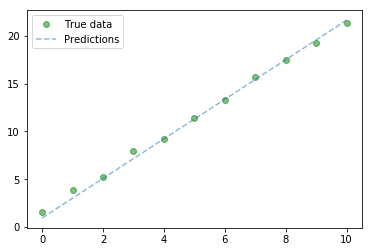

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### PyTorch实现一个简单的神经网络
Ref:
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)


params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight


input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)


net.zero_grad()
out.backward(torch.randn(1, 10))


output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)


print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU


net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)


learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)


import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
10
torch.Size([6, 1, 5, 5])
tensor([[-0.0016, -0.0701,  0.0672,  0.1103,  0.0444, -0.0310,  0.0073,  0.0326,
         -0.1183,  0.0337]], grad_fn=<AddmmBackward>)
tensor(0.6612, grad_fn=<MseLossBackward>)
conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0047,  0.0096, -0.0064,  0.0018,  0.0012, -0.0068])
